# Initialization
Import the necessary modules.

In [1]:
# init
%matplotlib inline
import numpy as np
from pylab import *
import h5py
client = get_bbp_client()

NameError: name 'get_bbp_client' is not defined

# Run task
Call the task with different input parameters. Output files can be manually accessed and downloaded in the Storage section, in the createPtNeuNet folder.

Input variables are:
* **createMinimalistNetwork** (bool): whether to create a circuit without model-specific neural and synaptic parameters
* **both_hemispheres** (bool): whether to create cells in both hemispheres
* **brainPercent** (float): percentage of whole brain to create in terms of cell numbers (between 0 and 100)
* **numEffSyn** (int): number of efferent synapses per neuron
* **glial_ratio** (float): ratio of glial cells in the brain (between 0 and 1)
* **inhibitory_ratio** (float): ratio of inhibitory neurons in the brain (between 0 and 1)
* **region_names** (list(string)): list of regions to be created, use the [Allen Brain atlas](http://atlas.brain-map.org/atlas?atlas=1) for a list of all possibilities (example: "Hippocampal formation", "Cerebellum", etc...)
* **experiment_numbers** (list(int)): list of rAAV injection experiments to use for connectivity
* **gpfs_output_folder** (string): output folder path on GPFS, to be specified if the generated data files **exceed 1Gb** and therefore cannot be downloaded from storage

In [2]:
createMinimalistNetwork = True
both_hemispheres = True
brainPercent = 1.0
numEffSyn = 10
glial_ratio = 0.3328418 # Herculano-Houzel 2011
inhibitory_ratio = 0.1213595233781016 # Gonchar 2007, Lefort et al. 2009
region_names = ["root"]
#region_names = ["Hippocampal formation", "Isocortex"]
experiment_numbers=[ 180436360, 180435652, 180719293, 180709942, 174957972, 180917660, 113144533, 158257355, 158258062, 180916954, 158314987, 180720175, 100141780, 114472145, 180717881, 181057754, 113935990, 127084296, 180074890, 112306316, 180709230, 112952510, 113036264, 112596790, 181058463, 112951804, 141603190, 115958115, 158374671, 142654100, 100141796, 175019536, 180674463, 180718587, 112514915, 174583187, 159024474, 180296424, 100141597, 146593590, 117298988, 175018829, 127991964, 100142655, 175142304, 157710335, 146553971, 126190743, 272414403, 126909424, 125832322, 170721670, 127089669, 175106769, 147135812, 126907302, 129573239, 122641078, 309004492, 146857301, 175072921, 126116848, 126861679, 159021559, 133286030, 127139568, 175374982, 125802444, 175374275, 113095845, 141602484, 115958825, 113935285, 175372863, 114008926, 174361746, 113400134, 127761449, 127795906, 100141599, 127397469, 126710740, 100141596, 114046440, 112514202, 112791318, 157654817, 114429338, 127907465, 112670853, 126860974, 309372716, 127866392, 180981417, 126852363, 307558646, 113887162, 180297139, 127222723, 158314278, 126908007, 113226232, 126709328, 142656218, 158738180, 307295727, 157063074, 120572378, 113846682, 146658879, 152994878, 114290938, 158838128, 112936582, 307743253, 127091083, 121145045, 114292355, 112308468, 156929391, 159650350, 157556400, 112935169, 309113907, 307137980, 307321674, 139311530, 158840459, 120437703, 112745073, 113884251, 114755099, 131068390, 158435826, 146984209, 158373181, 114291646, 127649005, 114474520, 112423392, 158914182, 174583904, 112458114, 157063781, 114250546, 112826458, 112229814, 307297141, 146470726, 100148142, 113096571, 119846129, 127041126, 127255962, 146658170, 100140949, 146858006, 175106053, 158841171, 180982124, 127797441, 146659588, 126710034, 125361005, 113368085, 146078721, 307296433, 126653015, 112307046, 126116142, 147212977, 127865687, 139426984, 100148503, 127138787, 127909584, 120282354, 112228391, 307320960, 114430043, 159649643, 112162251, 126523066, 112882565, 307593747, 121509711, 112672974, 127396051, 120761491, 112373830, 114249084, 147706228, 113313632, 123662982, 175265301, 127470271, 157711748, 120811946, 158737454, 156930126, 126523791, 147633885, 100141993, 116903968, 147354242, 100142569, 100141273, 100141454, 147159899, 127042540, 174736554, 147789031, 120280191, 156979988, 100140756, 127469566, 100141495, 117317884, 147635309, 114755811, 156978574, 113553300, 146012934, 272404772, 277710753, 121146455, 127710392, 120762196, 268389532, 180673746, 175158132, 307557934, 146858755, 139520203, 146794439, 113887868, 173206592, 100141563, 272697944, 146077302, 114155923, 272738620, 309385637, 126522350, 126189322, 174788109, 112597496, 146660293, 147787606, 113554719, 100149969, 114754390, 125830911, 146045723, 147354951, 114427219, 126646502, 127908173, 100142354, 113443572, 127041832, 174781014, 138058320, 277618762, 309003780, 156979283, 174360333, 128001349, 120875111, 156872043, 113166056, 116905391, 117316260, 112881858, 147632458, 123663689, 175263771, 272829745, 116900714, 127650431, 272875838, 126862385, 126188607, 142655513, 119846838, 272874417, 272737914, 100147785, 159648854, 117302771, 120491896, 146795148, 147215105, 112595376, 113399428, 100141473, 158435116, 157062358, 157654069, 147162736, 112372418, 127649713, 157659671, 112745787, 100141223, 117312486, 100149109, 112425523, 112229103, 272873704, 146984915, 158434409, 127468854, 304565427, 272830456, 157550122, 158915602, 125437921, 120571672, 147214398, 113784293, 100141434, 112373124, 100147861, 100141214, 127557915, 139519496, 268415561, 272875132, 127223428, 100141219, 158315810, 129567943, 158375425, 272824561, 112459547, 113369603, 158373958, 113766038, 156931568, 146046430, 113505468, 175263063, 147049515, 304586645, 100141598, 112672268, 120760759, 122641784, 272970747, 126352744, 114402050, 114399934, 127350480, 127083591, 272916915, 272782668, 120436274, 100141435, 266585624, 273025872, 175158844, 114472860, 158376179, 114008220, 272826010, 277615922, 175373569, 100148143, 116903230, 120812686, 125436508, 127353220, 146985623, 128056535, 127711803, 100147853, 119848249, 127762867, 272825299, 120493315, 120570964, 112424813, 121509005, 272969333, 174361040, 122640358, 180520257, 272700063, 120874405, 277480964, 158916311, 112827872, 147135107, 146553266, 112424102, 158321996, 180073473, 112167395, 277714322, 147353537, 180601025, 124059700, 143515102, 277616630, 180403712, 127255254, 148198052, 147162027, 112307754, 146856593, 126843905, 272968624, 100142580, 157549402, 114473794, 112458831, 277713580, 112789899, 113442864, 277712166, 142654808, 128002057, 125363160, 127796728, 146747721, 266693274, 273065264, 304564721, 125437216, 120280939, 180628971, 119847544, 272917631, 138059031, 127349111, 127085717, 112827164, 304585910, 127398177, 125831616, 147134401, 272916202, 146986331, 114400640, 277618054, 114045733, 148197327, 113783321, 114399224, 148964212, 175072215, 273068974, 273028004, 180523704, 113936696, 126351299, 180708524, 175264587, 147790181, 272970039, 267494468, 272967913, 100141222, 120438416, 180707817, 127711098, 152995635, 273026584, 273025166, 304762965, 120494729, 120436988, 273055501, 272918345, 180404418, 158738894, 100148443, 113504763, 141601779, 125801739, 126352037, 146012184, 126115436, 121145750, 112460257, 180568155, 126843200, 100148554 ]
gpfs_output_folder = ""
# run task
createPtNeuNet_task = client.get_latest_task('createPtNeuNet').job_launcher({'total_physical_memory': 24048})
results = createPtNeuNet_task(get_collab_storage_path(), createMinimalistNetwork, both_hemispheres, brainPercent, numEffSyn, glial_ratio, inhibitory_ratio, region_names, experiment_numbers, gpfs_output_folder).wait()

NameError: name 'client' is not defined

Your job should appear in the [Job Manager](https://collab.humanbrainproject.eu/#/collab/521/nav/6551) section and might take a while.

After this task has finished, the ouput files should be in the [Storage](https://collab.humanbrainproject.eu/#/collab/521/nav/4623) section in the  createPtNeuNet folder.

# View generated data
This part is **optional** and is only useful if you want to verify your results directly from this notebook, as long as the generated files do not exceed 1Gb.

Download the cell and synapse datasets, and load some of them into local variables:

In [17]:
# download files
# client.document.download_file_by_id(results[0][0], 'network_cells.h5')
# client.document.download_file_by_id(results[0][1], 'network_synapsesAAV.h5')
network_cells = h5py.File('latest_2016/network_cells.h5', 'r')
# load x, y, and z positions of neurons
x=network_cells['x'][:]; y=network_cells['y'][:]; z=network_cells['z'][:]
# load the color components of neurons (AIBS colors)
cx=network_cells['colorx'][:]; cy=network_cells['colory'][:]; cz=network_cells['colorz'][:]
# load x, y, and z positions of glia
gx=network_cells['gliax'][:]; gy=network_cells['gliay'][:]; gz=network_cells['gliaz'][:]
# load wether neuron is excitatory or not
isExc=network_cells['excitatory'][:];
# load the injection experiment number of neurons
injNum=network_cells['injNum'][:];
network_cells.close()

Display cell positions using regional colors of the AIBS:

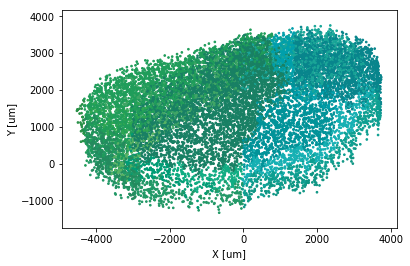

In [18]:
# only plot every dS cells
dS = 10; 
ddS = np.s_[::dS]; pointarea = 4e4/float(x[ddS].shape[0]);
figure(); 
scatter(x[ddS], y[ddS], c=np.vstack((cx[ddS],cy[ddS],cz[ddS])).T/255.0, s=pointarea, edgecolors='face'); 
xlabel('X [um]'); ylabel('Y [um]'); axis('equal');

Display neurons and glia in a 2D plane:

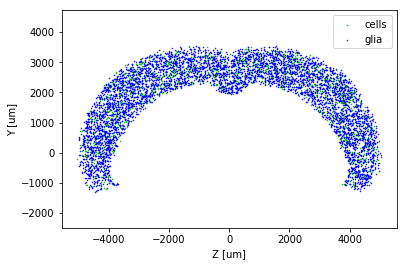

In [19]:
# plot cells and glia in a 2D plane of depth dX [um]
dX = 200.0;
# only plot every dS cells
dS = 1;
ddS = np.s_[::dS]; pointarea = 4e4/float(x[ddS].shape[0]);
figure(); 
scatter(gz[ddS][(gx[ddS]>-dX*0.5)*(gx[ddS]<dX*0.5)], gy[ddS][(gx[ddS]>-dX*0.5)*(gx[ddS]<dX*0.5)], c=[0.0,0.7,0.0], s=pointarea, edgecolors='face');
scatter( z[ddS][( x[ddS]>-dX*0.5)*( x[ddS]<dX*0.5)],  y[ddS][( x[ddS]>-dX*0.5)*( x[ddS]<dX*0.5)], c=[0.0,0.0,1.0], s=pointarea, edgecolors='face');
legend(['cells','glia']); axis('equal');
xlabel('Z [um]'); ylabel('Y [um]');

Display Excitatory and Inhibitory neurons in a 2D plane:

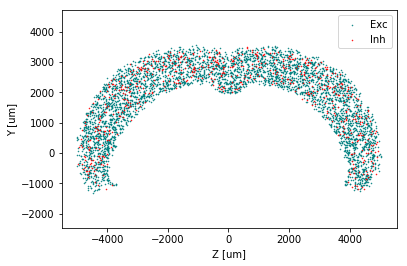

In [12]:
# plot excitatory and inhibitory neurons in a 2D plane of depth dX [um]
dX = 200.0;
# only plot every dS cells
dS = 1;
ddS = np.s_[::dS]; pointarea = 4e4/float(x[ddS].shape[0]);
figure(); 
scatter( z[isExc==1][ddS][( x[isExc==1][ddS]>-dX*0.5)*( x[isExc==1][ddS]<dX*0.5)],  y[isExc==1][ddS][( x[isExc==1][ddS]>-dX*0.5)*( x[isExc==1][ddS]<dX*0.5)], c=[0.0,0.5,0.5], s=pointarea, edgecolors='face');
scatter( z[isExc==0][ddS][( x[isExc==0][ddS]>-dX*0.5)*( x[isExc==0][ddS]<dX*0.5)],  y[isExc==0][ddS][( x[isExc==0][ddS]>-dX*0.5)*( x[isExc==0][ddS]<dX*0.5)], c=[1.0,0.0,0.0], s=pointarea, edgecolors='face');
legend(['Exc','Inh']); axis('equal');
xlabel('Z [um]'); ylabel('Y [um]');

Display neurons and their synaptic targets, for a specific injection experiment:

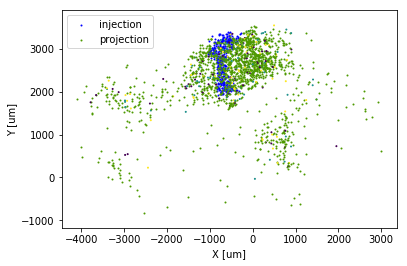

In [13]:
figure(); 
injNumTMP = 180720175
scatter( x[injNum==injNumTMP],  y[injNum==injNumTMP], c=[0.0,0.0,1.0], s=1.0, edgecolors='face');
network_syns = h5py.File('latest_2016/network_synapsesAAV.h5', 'r')
for id_ in np.where(injNum==injNumTMP)[0]:
    try:
        targets = network_syns["synT_"+str(id_)][:]
        scatter( x[targets],  y[targets], c=[0.3,0.6,0.0], s=1.0, edgecolors='face');
    except:
        targets = None
network_syns.close()
legend(['injection','projection']); axis('equal');
xlabel('X [um]'); ylabel('Y [um]');

Clean up:

In [10]:
!rm *
!ls -l

total 0
